# Input & Label

In [102]:
from rtmag.paper.load import load_input_label, MyModel

In [103]:
input_files, label_files = load_input_label("/mnt/f/isee_dataset/11158")
len(input_files), len(label_files)

(66, 66)

In [104]:
idx = 41
input_files[idx]

PosixPath('/mnt/f/isee_dataset/11158/input/input_11158_20110215_000000.npz')

# Model prediction & Label (NLFFF, Potential)

In [105]:
from time import time

In [106]:
# mm = MyModel("/home/mgjeon/space/workspace/base/pino_CC_Hnorm_Unit_2/best_model.pt")
mm = MyModel("/home/mgjeon/space/workspace/base/uno_pi_cc_hnorm_unit_aug/best_model.pt")
# mm2 = MyModel("/home/mgjeon/space/workspace/base/uno_pi_cc_hnorm_unit_aug/model_60.pt")

Model loaded from epoch 40


In [107]:
start_time = time()
b = mm.get_pred(input_files[idx])
print(f"{time() - start_time} seconds")

0.8695003986358643 seconds


In [108]:
start_time = time()
B = mm.get_label(label_files[idx])
print(f"{time() - start_time} seconds")

4.0559821128845215 seconds


In [109]:
start_time = time()
Bp = mm.get_pot(label_files[idx])
print(f"{time() - start_time} seconds")

1.6448774337768555 seconds


In [110]:
start_time = time()
dx, dy, dz, dV = mm.get_dV(input_files[idx])
print(f"{time() - start_time} seconds")

0.0042955875396728516 seconds


# Qualitative Evaluation

In [111]:
import matplotlib.pyplot as plt

/tmp/ipykernel_3439168/1438892077.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


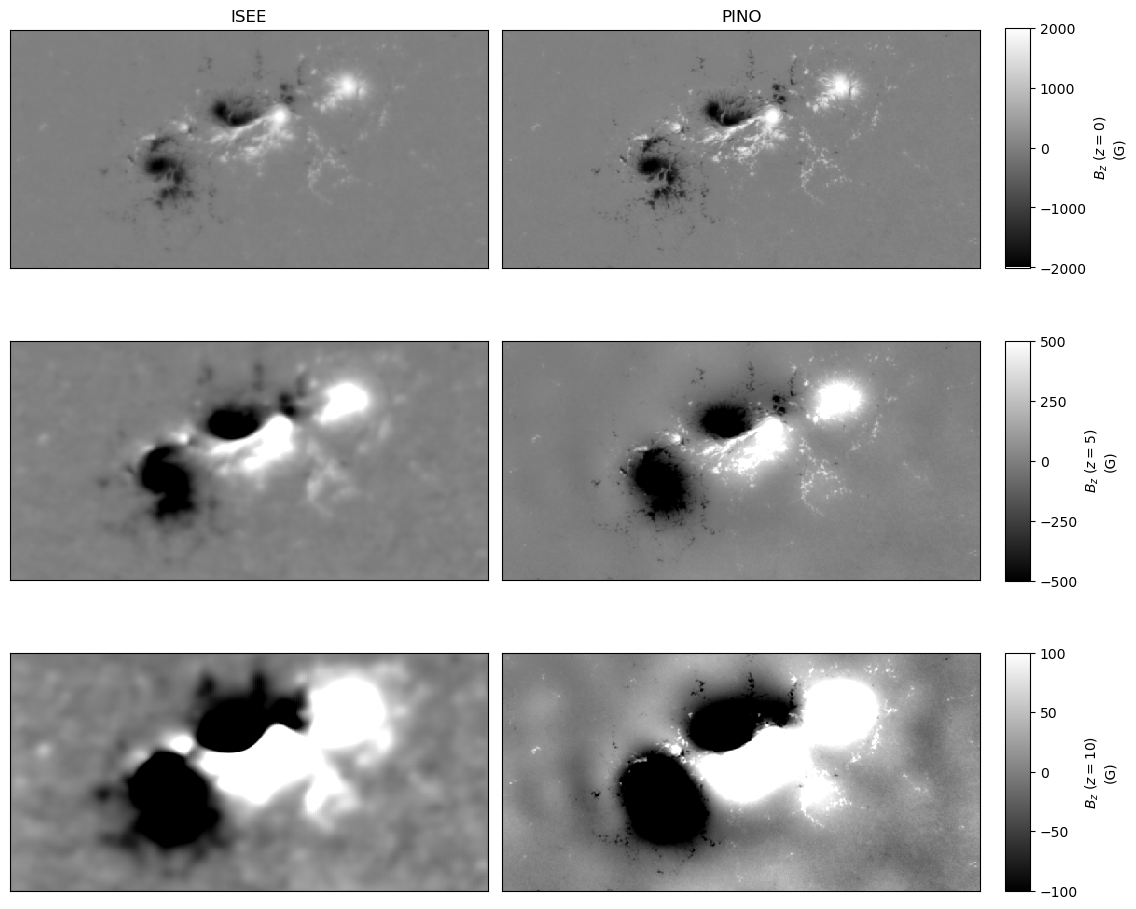

In [112]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

axs[0, 0].pcolormesh(B[:, :, 1, 2].T, cmap="gray", vmin=-2000, vmax=2000)
axs[0, 0].set_title("ISEE")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].set_aspect("equal")

im = axs[0, 1].pcolormesh(b[:, :, 0, 2].T, cmap="gray", vmin=-2000, vmax=2000)
axs[0, 1].set_title("PINO")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.693, 0.025, 0.24])
fig.colorbar(im, cax=cax, label='$B_z$ $(z=0)$\n(G)', ticks=[-2000, -1000, 0, 1000, 2000])

axs[1, 0].pcolormesh(B[:, :, 5, 2].T, cmap="gray", vmin=-500, vmax=500)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].set_aspect("equal")

im = axs[1, 1].pcolormesh(b[:, :, 5, 2].T, cmap="gray", vmin=-500, vmax=500)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
fig.colorbar(im, cax=cax, label='$B_z$ $(z=5)$\n(G)', ticks=[-500, -250, 0, 250, 500])
# fig.colorbar(im)

axs[2, 0].pcolormesh(B[:, :, 10, 2].T, cmap="gray", vmin=-100, vmax=100)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
axs[2, 0].set_aspect("equal")

im = axs[2, 1].pcolormesh(b[:, :, 10, 2].T, cmap="gray", vmin=-100, vmax=100)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
axs[2, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
fig.colorbar(im, cax=cax, label='$B_z$ $(z=10)$\n(G)', ticks=[-100, -50, 0, 50, 100])
# fig.colorbar(im)


plt.tight_layout()
plt.show()

/tmp/ipykernel_3439168/759628588.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


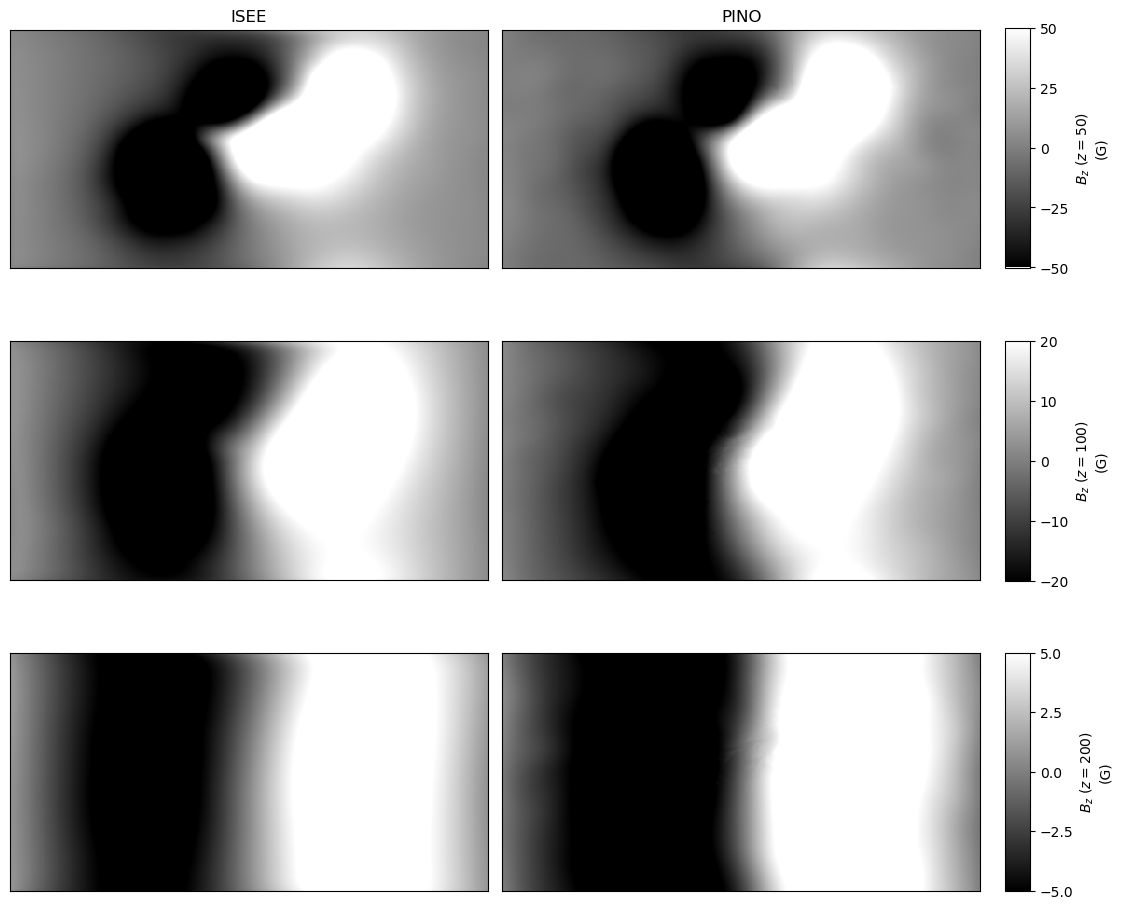

In [113]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

z = 50
vmm = 50
axs[0, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title("ISEE")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].set_aspect("equal")

im = axs[0, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title("PINO")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.693, 0.025, 0.24])
fig.colorbar(im, cax=cax, label=f'$B_z$ $(z={z})$\n(G)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])

z = 100
vmm = 20
axs[1, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].set_aspect("equal")

im = axs[1, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
fig.colorbar(im, cax=cax, label=f'$B_z$ $(z={z})$\n(G)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
# fig.colorbar(im)

z = 200
vmm = 5
axs[2, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
axs[2, 0].set_aspect("equal")

im = axs[2, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
axs[2, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
fig.colorbar(im, cax=cax, label=f'$B_z$ $(z={z})$\n(G)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
# fig.colorbar(im)


plt.tight_layout()
plt.show()

In [114]:
from rtmag.paper.metric import vector_norm, current_density
import numpy as np

In [115]:
start_time = time()
j = current_density(b, dx, dy, dz)  # [mA/m^2]
j_map = vector_norm(j).sum(2) 
j_map *= 1e-7 # A/cm^2
j_map *= dz # A/cm
print(f"{time() - start_time} seconds")

0.9428832530975342 seconds


In [116]:
start_time = time()
J = current_density(B, dx, dy, dz)
J_map = vector_norm(J).sum(2) # A/m^2
J_map *= 1e-7 # A/cm^2
J_map *= dz # A/cm
print(f"{time() - start_time} seconds")

0.5004429817199707 seconds


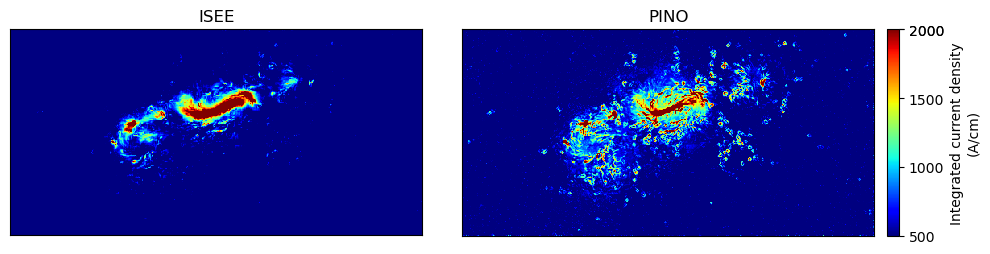

In [117]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

vmin = 500
vmax = 2000

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(J_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(j_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])

plt.tight_layout()
plt.show()

In [118]:
e_den = (vector_norm(b)**2)/(8*np.pi)   # erg/cm^3
E_den = (vector_norm(B)**2)/(8*np.pi)

e_map = e_den.sum(2) * dz   # erg/cm^2
E_map = E_den.sum(2) * dz

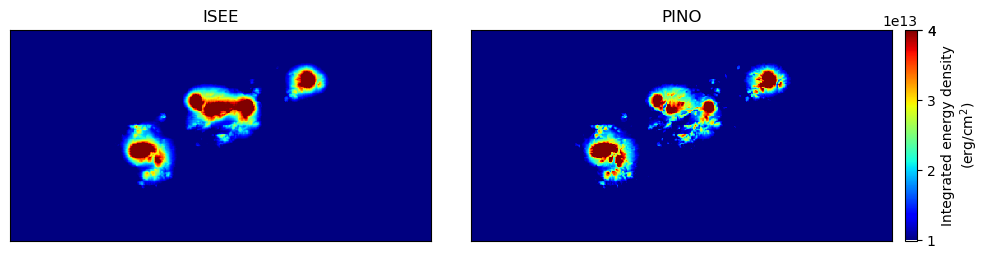

In [119]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

vmin = 1e13
vmax = 4e13

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(E_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(e_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
fig.colorbar(im, cax = cax, label='Integrated energy density\n(erg/cm$^2$)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])

plt.tight_layout()
plt.show()

In [120]:
from nf2.potential.potential_field import get_potential_field

In [121]:
def greenpot(bz, nx, ny):
    """
    function: greenpot

    This function extrapolates the potential magnetic field using Green's functions.
    The underlying assuption of a potential field is that it is Maxwell-stress free.
    The monopole depth is 0.01 pixels.
    """
    print('Calculating the potential field. This takes a minute.')

    nnx = nx
    nny = ny
    
    # define the monopole depth, dz
    dz = 0.1

    # malloc some arrays
    pfpot      = np.zeros([nny,nnx])
    rdist      = np.zeros([nny,nnx])
    bztmp      = np.zeros([nny,nnx])
    bxp        = np.zeros([nny,nnx])
    byp        = np.zeros([nny,nnx])

    # substitute zeros for nans in bz
    for iny in range(nny):
        for inx in range(nnx):
            if np.isnan(bz[iny,inx]):
                bztmp[iny,inx] = 0.0
            else:
                bztmp[iny,inx] = bz[iny,inx]

    rdd  = 0.0
    rdd1 = 0.0
    rdd2 = 0.0
    for iny in range(nny):
        for inx in range(nnx):
            rdd1  = float(inx)
            rdd2  = float(iny)
            rdd   = rdd1 * rdd1 + rdd2 * rdd2 + dz * dz
            rdist[iny,inx] = 1.0/(np.sqrt(rdd))

    iwindow = 0
    if (nnx > nny):
        iwindow = nnx
    else:
        iwindow = nny

    rwindow = float(iwindow)
    rwindow = rwindow * rwindow + 0.01 # must be square    
    rwindow = 1.0e2                    # limit the window size to be 10.    
    rwindow = np.sqrt(rwindow)
    iwindow = int(rwindow)

    for iny in range(nny):
        for inx in range(nnx):
            if np.isnan(bz[iny,inx]):
                pfpot[iny,inx] = 0.0
            else:
                sum = 0.0
                j2s = iny - iwindow
                j2e = iny + iwindow
                if (j2s < 0):
                    j2s = 0
                if (j2e > nny):
                    j2e = nny
                i2s = inx - iwindow
                i2e = inx + iwindow
                if (i2s < 0):
                    i2s = 0
                if (i2e > nnx):
                    i2e = nnx
                for j2 in range(j2s,j2e):
                    for i2 in range(i2s,i2e):
                        val1 = bztmp[j2,i2]
                        di = abs(i2 - inx)
                        dj = abs(j2 - iny)
                        sum = sum + val1 * rdist[dj,di] * dz
                pfpot[iny,inx] = sum
    
    for iny in range(1,nny-1):
        for inx in range(1,nnx-1):
            bxp[iny,inx] = -(pfpot[iny,inx+1] - pfpot[iny,inx-1])*0.5
            byp[iny,inx] = -(pfpot[iny+1,inx] - pfpot[iny-1,inx])*0.5

    return [bxp, byp]

In [122]:
bzz = b[:, :, 0, 2].T
nx = bzz.shape[1]
ny = bzz.shape[0]

bpx, bpy = greenpot(bzz, nx, ny)

Calculating the potential field. This takes a minute.


In [123]:
bp = get_potential_field(b[:, :, 0, 2], 64, batch_size=1000)

Potential Field:   1%|          | 62/8389 [00:02<06:05, 22.78it/s]


KeyboardInterrupt: 

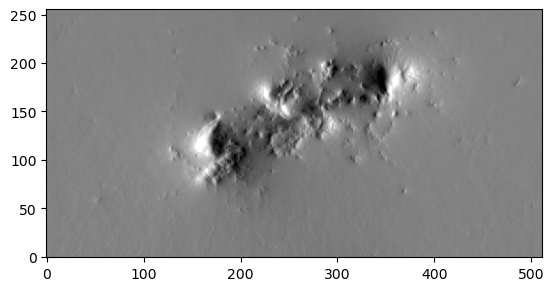

In [ ]:
plt.imshow(Bp[:, :, 0, 0].T, origin='lower', cmap='gray', vmin=-1000, vmax=1000)

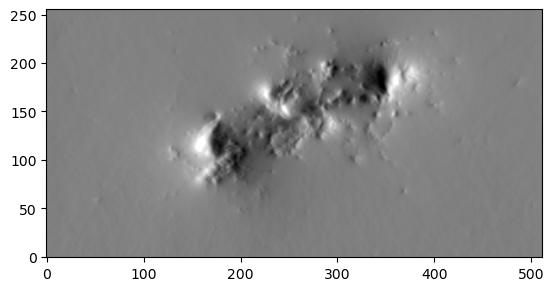

In [ ]:
plt.imshow(bp[:, :, 0, 0].T, origin='lower', cmap='gray', vmin=-1000, vmax=1000)

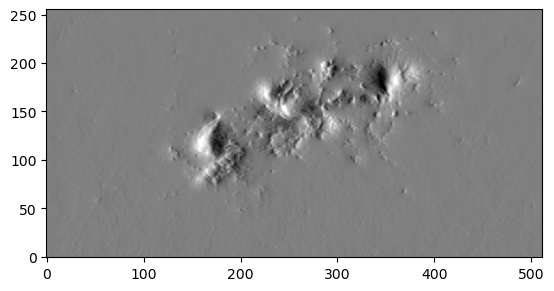

In [ ]:
plt.imshow(bpx, origin='lower', cmap='gray', vmin=-1000, vmax=1000)

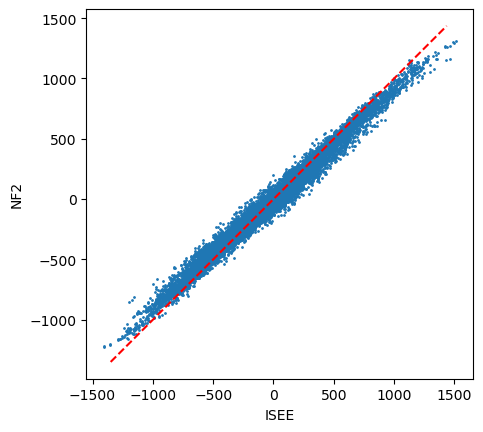

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Bp[:, :, 0, 0].flatten(), bp[:, :, 0, 0].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red")
ax.set_xlabel("ISEE")
ax.set_ylabel("NF2")
ax.set_aspect("equal")
plt.show()

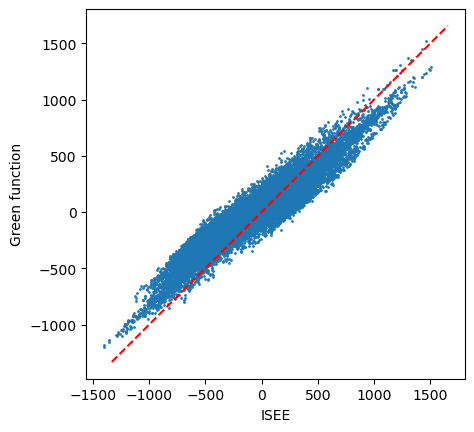

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Bp[:, :, 0, 0].flatten(), bpx.T.flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red")
ax.set_xlabel("ISEE")
ax.set_ylabel("Green function")
ax.set_aspect("equal")
plt.show()

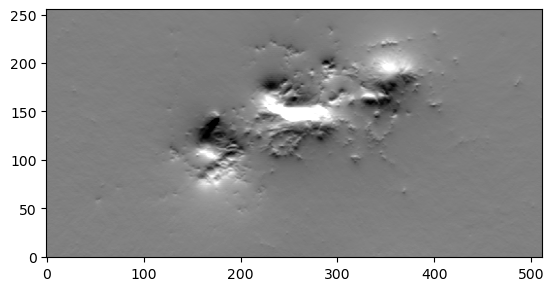

In [ ]:
plt.imshow(Bp[:, :, 0, 1].T, origin='lower', cmap='gray', vmin=-1000, vmax=1000)

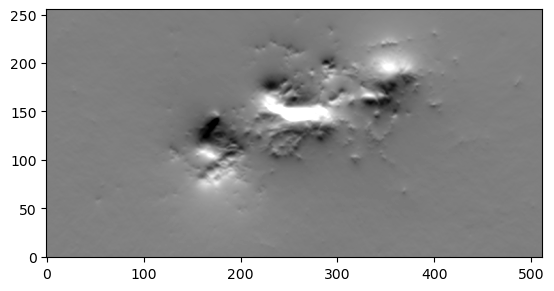

In [ ]:
plt.imshow(bp[:, :, 0, 1].T, origin='lower', cmap='gray', vmin=-1000, vmax=1000)

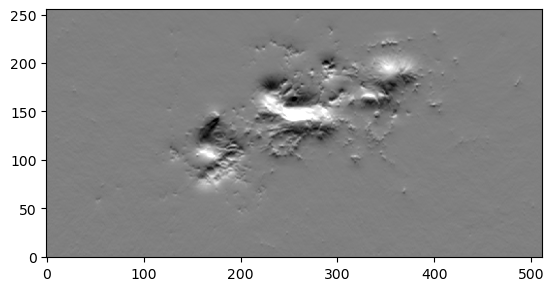

In [ ]:
plt.imshow(bpy, origin='lower', cmap='gray', vmin=-1000, vmax=1000)

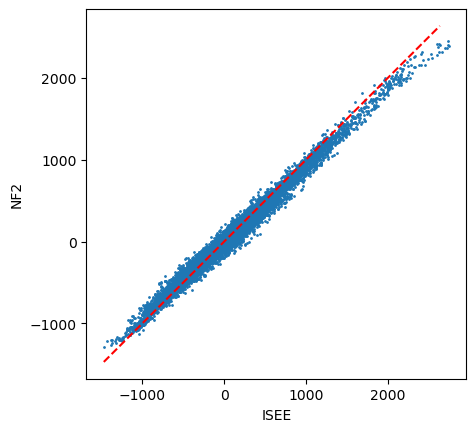

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Bp[:, :, 0, 1].flatten(), bp[:, :, 0, 1].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red")
ax.set_xlabel("ISEE")
ax.set_ylabel("NF2")
ax.set_aspect("equal")
plt.show()

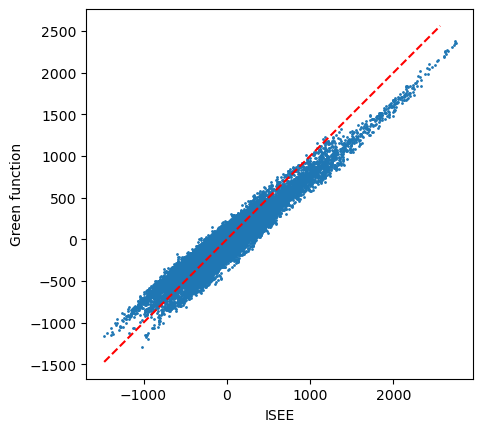

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Bp[:, :, 0, 1].flatten(), bpy.T.flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red")
ax.set_xlabel("ISEE")
ax.set_ylabel("Green function")
ax.set_aspect("equal")
plt.show()

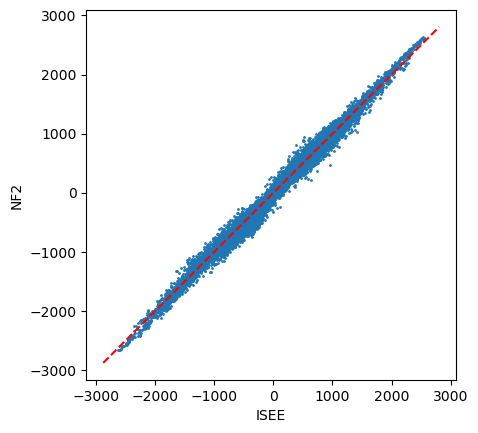

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Bp[:, :, 0, 2].flatten(), bp[:, :, 0, 2].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red")
ax.set_xlabel("ISEE")
ax.set_ylabel("NF2")
ax.set_aspect("equal")
plt.show()

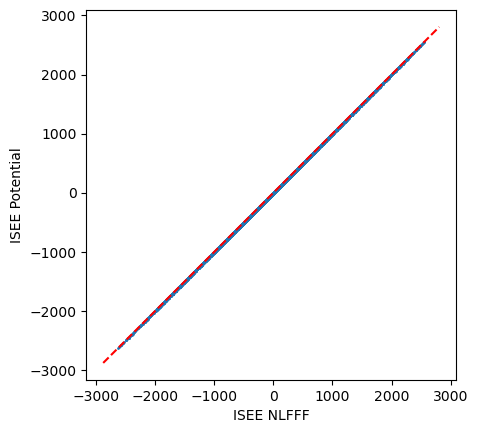

In [ ]:
fig, ax = plt.subplots()
ax.scatter(B[:, :, 0, 2].flatten(), Bp[:, :, 0, 2].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red")
ax.set_xlabel("ISEE NLFFF")
ax.set_ylabel("ISEE Potential")
ax.set_aspect("equal")
plt.show()

In [ ]:
ep_den = (vector_norm(bp)**2)/(8*np.pi)   # erg/cm^3
Ep_den = (vector_norm(Bp)**2)/(8*np.pi)

ep_map = ep_den.sum(2) * dz   # erg/cm^2
Ep_map = Ep_den.sum(2) * dz

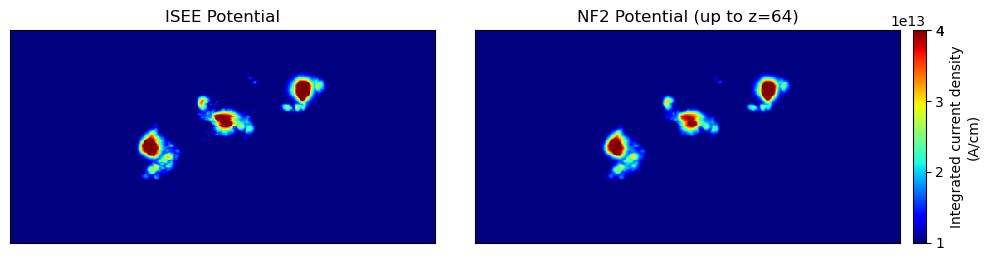

In [ ]:
vmin = 1e13
vmax = 4e13

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(Ep_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE Potential")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(ep_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("NF2 Potential (up to z=64)")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])

plt.tight_layout()
plt.show()

In [ ]:
E_free_map = E_map - Ep_map
e_free_map = e_map - Ep_map

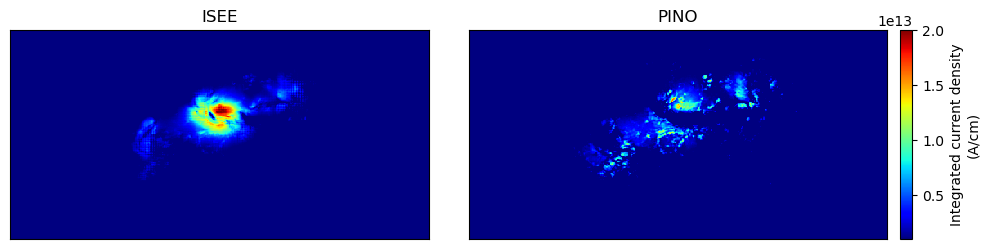

In [ ]:
vmin = 1e12
vmax = 2e13

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(E_free_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(e_free_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)')

plt.tight_layout()
plt.show()